# <span style="color:darkblue;">[LDATS2350] - DATA MINING</span>

### <span style="color:darkred;">Python10 - Outliers</span>

**Prof. Robin Van Oirbeek**  

<br/>

**<span style="color:darkgreen;">Guillaume Deside</span>** (<span style="color:gray;">guillaume.deside@uclouvain.be</span>)

---

## **Why Do We Need to Manage Outliers in Data Mining?**

### **🔹 What Are Outliers?**
Outliers are **data points that significantly deviate** from the rest of the dataset. They may be:
- **Errors** in data collection or entry.
- **Legitimate rare events** that represent valuable insights.
- **Unusual patterns** that could indicate fraud, anomalies, or defects.

---

## **🔹 Why Are Outliers Important in Data Mining?**
Outliers can **negatively impact machine learning models and statistical analyses** if not handled properly.

### **1️⃣ Impact on Data Distribution**
- Outliers **skew mean and standard deviation**, making statistical summaries misleading.
- Affect **normality assumptions** used in statistical tests.

### **2️⃣ Model Performance Issues**
- **Linear models (e.g., Linear Regression, Logistic Regression)**: Sensitive to extreme values, leading to incorrect predictions.
- **Clustering algorithms (e.g., K-Means)**: Outliers can distort cluster centers.
- **Distance-based models (e.g., KNN, SVMs)**: Outliers can mislead classification and increase computational cost.

### **3️⃣ Data Quality & Integrity**
- Outliers can be **errors** or **measurement mistakes**.
- Cleaning outliers **improves data reliability** for better insights.

---

## **🔹 How to Detect Outliers?**
Several techniques can be used:

1. **Statistical Methods**
   - **Z-score (Standardization)**: Data points with `|Z-score| > 3` are considered outliers.
   - **IQR (Interquartile Range)**: Outliers are outside `[Q1 - 1.5*IQR, Q3 + 1.5*IQR]`.

2. **Visualization Techniques**
   - **Boxplots**: Quick way to spot extreme values.
   - **Scatter plots**: Detect outliers in numerical data.
   - **Histograms & KDE plots**: Show distribution anomalies.

3. **Machine Learning-Based Detection**
   - **Isolation Forests**: Anomaly detection using decision trees.
   - **DBSCAN Clustering**: Identifies noise points as outliers.
   - **LOF (Local Outlier Factor)**: Measures local density deviations.

---

## **🔹 How to Handle Outliers?**
Once detected, we can:

✅ **Remove**: If an outlier is an obvious error.  
✅ **Transform**: Apply **log transformation, Winsorization, or robust scaling**.  
✅ **Impute**: Replace with **median** or use predictive models for missing or extreme values.  
✅ **Keep**: If outliers hold important information (e.g., fraud detection, rare events).

---

# Generate a dataset

In [6]:
import numpy as np

np.random.seed(42)

# Generate train data
X = 0.3 * np.random.randn(100, 2)
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X + 2, X - 2, X_outliers] #concatenate 

<div style="border: 2px solid darkblue; padding: 10px; background-color: #89D9F5;">

### **Exercise - Visualizing Normal vs. Abnormal Observations in a Dataset**

#### **Objective**
- Learn how to **visualize a dataset** containing **normal and abnormal (outlier) observations**.
- Use **scatter plots** to differentiate between two categories.
- Adjust **plot aesthetics** for better interpretation.

---

#### **Instructions**

1. **Plot the Data Points**:
   - The first **200 points** in `X` represent **normal observations** (plotted in **white**).
   - The remaining **abnormal observations** (outliers) are plotted in **red**.

2. **Customize the Scatter Plot**:
   - Set **figure size** using `plt.rcParams["figure.figsize"]`.
   - Assign **edge colors** to markers for better visibility.
   - Adjust **axis limits** to ensure all points are well-distributed.

3. **Add a Legend and Title**:
   - Label **normal vs. abnormal points** in the **legend**.
   - Give a **descriptive title** to the plot.

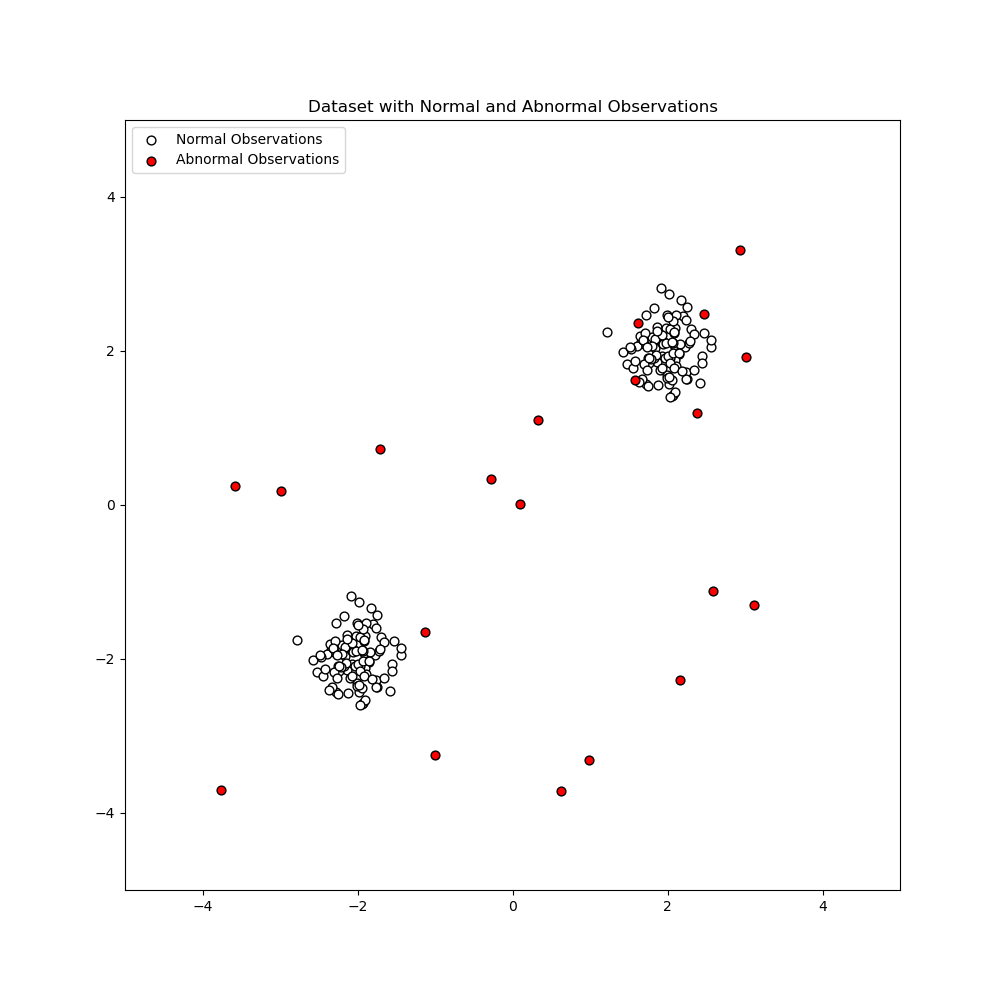

# Automatic multivariate tools

This code uses **Local Outlier Factor (LOF)** from `sklearn.neighbors` to **detect anomalies (outliers) in a dataset**. LOF is an **unsupervised anomaly detection algorithm** that measures the **local density deviation** of a data point compared to its neighbors.

**What Does the LOF Algorithm Do?**

- **Computes local density** for each point based on its nearest neighbors.
- **Compares each point’s density** to its neighbors:
  - If the density is **significantly lower**, the point is classified as an **outlier**.
- **Outputs anomaly scores**:
  - **Higher negative scores** indicate **stronger anomalies**.
  - **Values closer to 0** suggest **normality**.


In [14]:
from sklearn.neighbors import LocalOutlierFactor

# fit the model
clf = LocalOutlierFactor(n_neighbors=20, novelty=True)
clf.fit(X)
y_pred_test = clf.predict(X)
y_pred_outliers = y_pred_test[200:]

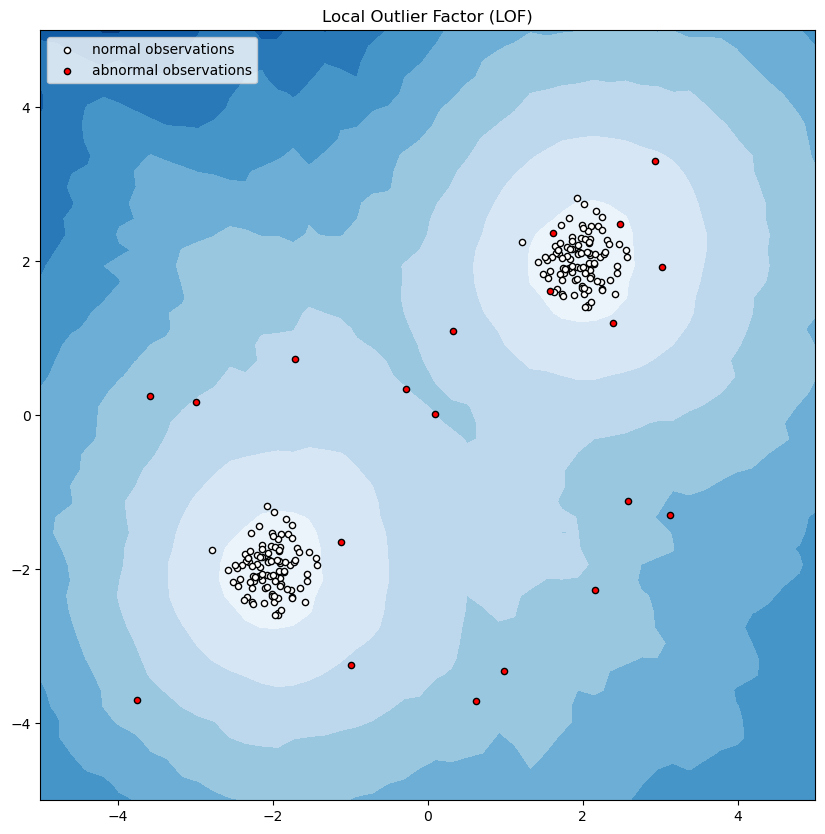

In [15]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)


plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

a = plt.scatter(X[:200, 0], X[:200, 1], c='white',
                edgecolor='k', s=20)
b = plt.scatter(X[200:, 0], X[200:, 1], c='red',
                edgecolor='k', s=20)
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([a, b],
           ["normal observations",
            "abnormal observations"],
           loc="upper left")

plt.title("Local Outlier Factor (LOF)")

plt.show()

<div style="border: 2px solid darkblue; padding: 10px; background-color: #89D9F5;">

### **Exercise - Anomaly Detection Using Isolation Forest**

#### **Objective**
- Learn how to use **Isolation Forest** to detect anomalies.
- Visualize **decision boundaries** and compare normal vs. abnormal observations.
- Understand how **tree-based models** identify outliers.

---

#### **Instructions**
1. **Train the Isolation Forest model**:
   - Use `IsolationForest(max_samples=100)` to fit the dataset `X`.
   - Predict **outliers** using `clf.predict(X)`.

2. **Visualize the Decision Function**:
   - Compute `clf.decision_function()` on a **grid of values**.
   - Generate a **contour plot** to visualize **anomaly regions**.

3. **Scatter Plot for Anomalies**:
   - Plot **normal observations** in **white**.
   - Plot **abnormal observations** (outliers) in **red**.

---

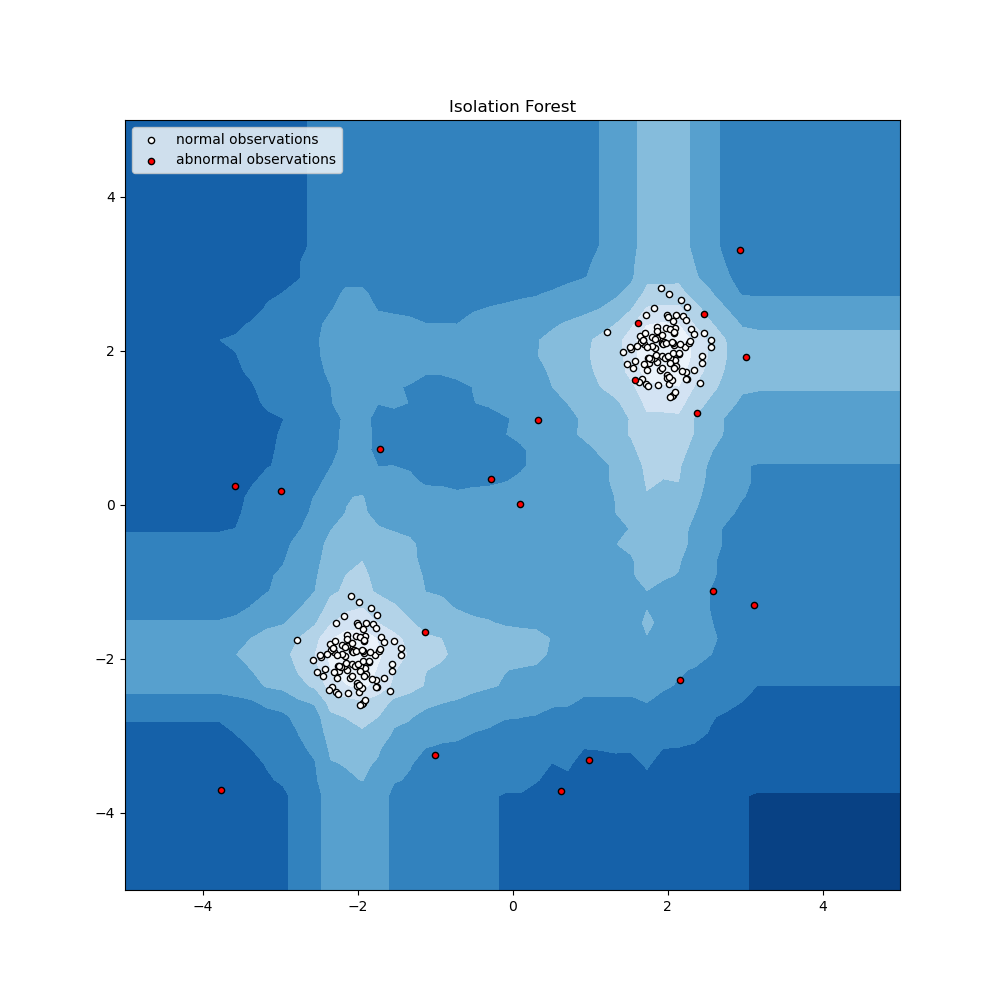

Different methods mean different results

![outliers methods](https://scikit-learn.org/0.20/_images/sphx_glr_plot_anomaly_comparison_001.png)

# Direct exploration

<div style="border: 2px solid darkblue; padding: 10px; background-color: #89D9F5;">

### **Exercise - Detecting and Removing Outliers Using Standard Deviation**

#### **Objective**
- Learn how to **detect and remove outliers** using the **standard deviation method**.
- Visualize **data distribution before and after outlier removal**.
- Understand the effect of **truncating data** based on standard deviation.

---

#### **Instructions**
1. **Generate a Normally Distributed Dataset**:
   - Create **200 random values** from a **normal distribution**.
   - Store them in a Pandas **DataFrame**.

2. **Visualize the Data Before Removing Outliers**:
   - **Plot a histogram** to observe the initial distribution.
   - **Create a boxplot** to identify potential outliers.

3. **Detect & Remove Outliers**:
   - Compute the **mean** and **standard deviation** of the dataset.
   - Remove **all values beyond ±3 standard deviations** from the mean.

4. **Visualize the Data After Removing Outliers**:
   - Re-plot the **histogram** to see the effect of outlier removal.

---

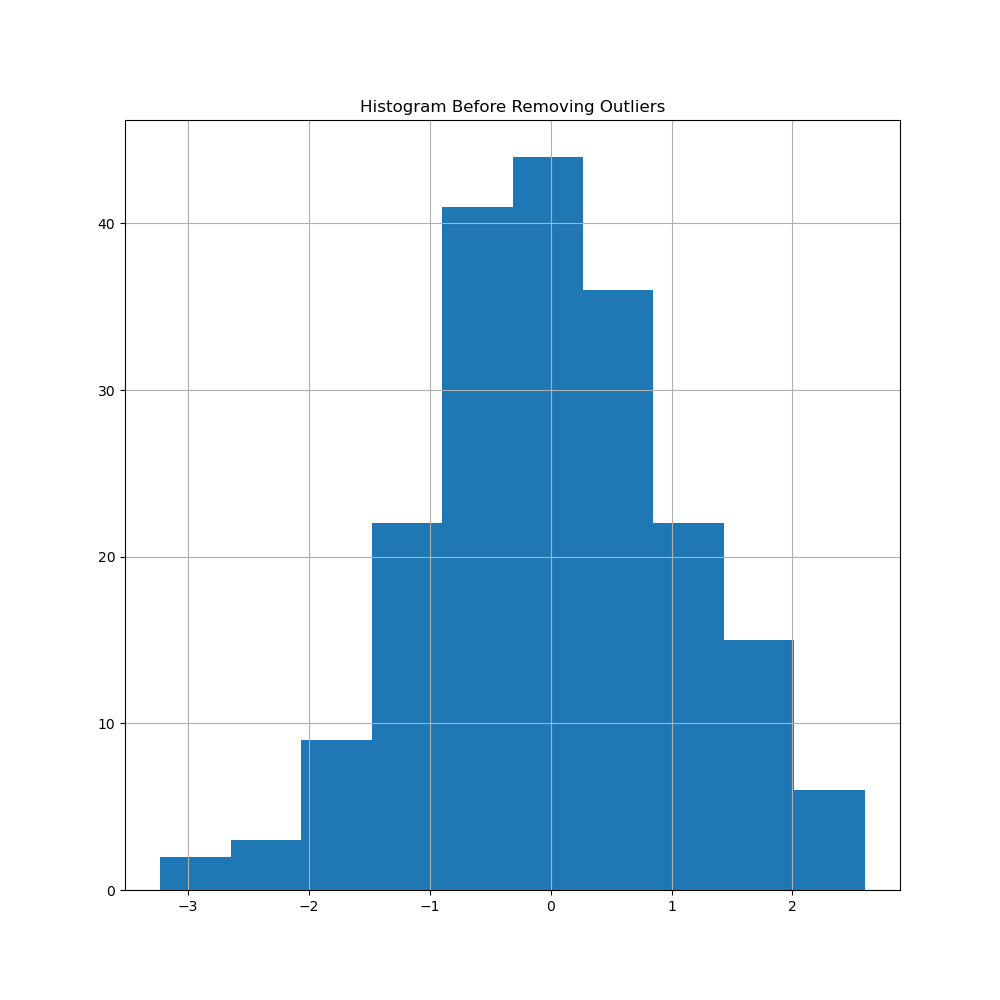

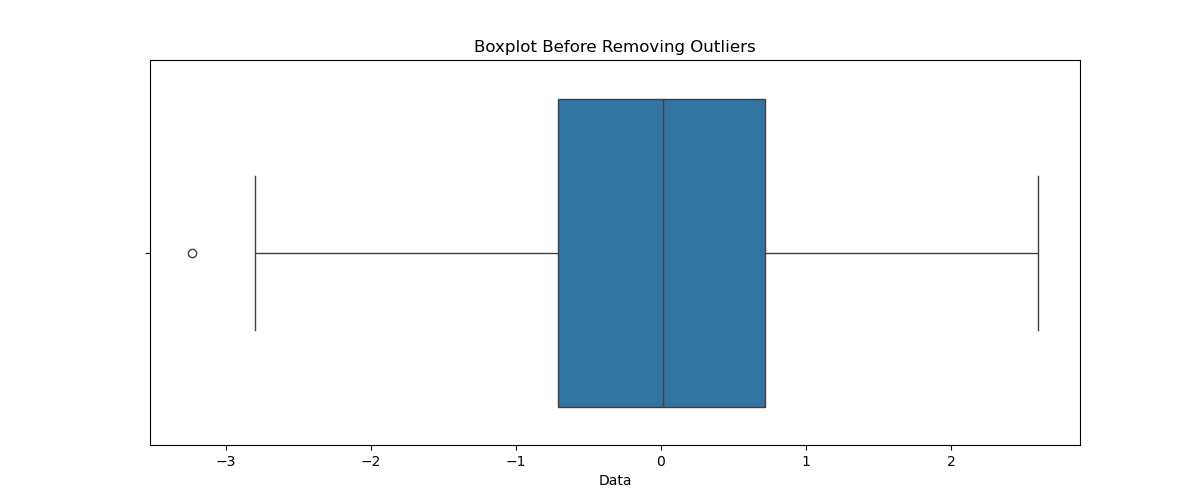

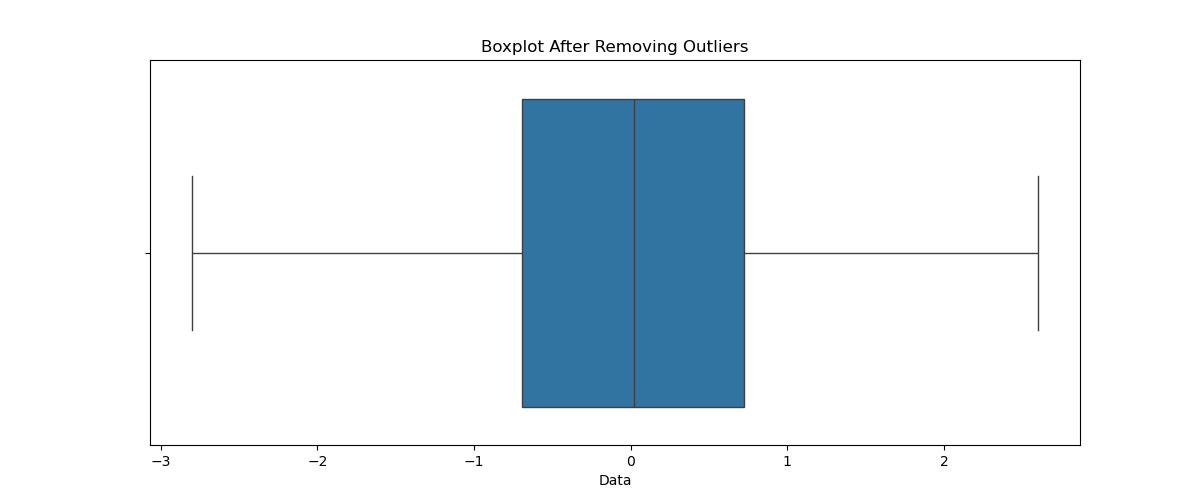

<div style="border: 2px solid darkblue; padding: 10px; background-color: #89D9F5;">

### **Exercise - Removing Outliers in the Boston Housing Dataset**

#### **Objective**
- Learn how to **detect and remove outliers** from the **Boston Housing Dataset**.
- Use **descriptive statistics and visualization** to identify outliers.
- Apply **both standard deviation and IQR (Interquartile Range) methods** for outlier removal.

---

#### **Instructions**
1. **Load the Boston Housing Dataset**:
   - The code is provided

2. **Visualize the Data**:
   - Plot **boxplots** and **histograms** for numeric columns to detect potential outliers.

3. **Detect Outliers**:
   - Compute **mean** and **standard deviation**, then filter out values **beyond ±3 standard deviations**.
   - Compute **IQR (Interquartile Range)** and filter out values **outside the range `[Q1 - 1.5*IQR, Q3 + 1.5*IQR]`**.

4. **Compare Data Before & After Outlier Removal**:
   - Print dataset **shape before and after** removing outliers.
   - Visualize data again to check the effect of outlier removal.

---

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

import pandas as pd

# Load the dataset from an online source
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# Display dataset information
print(df.head())
print(df.info())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float6

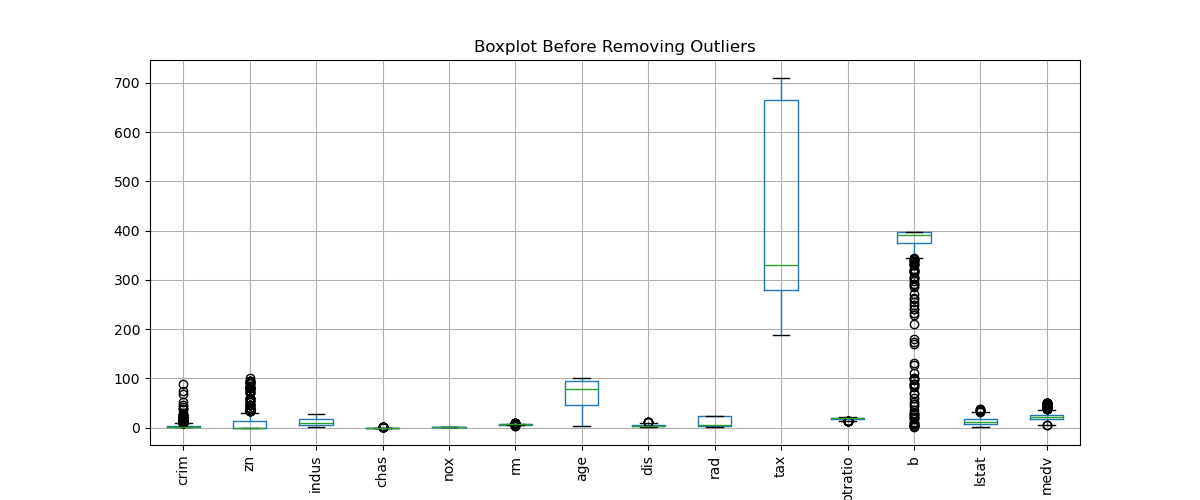

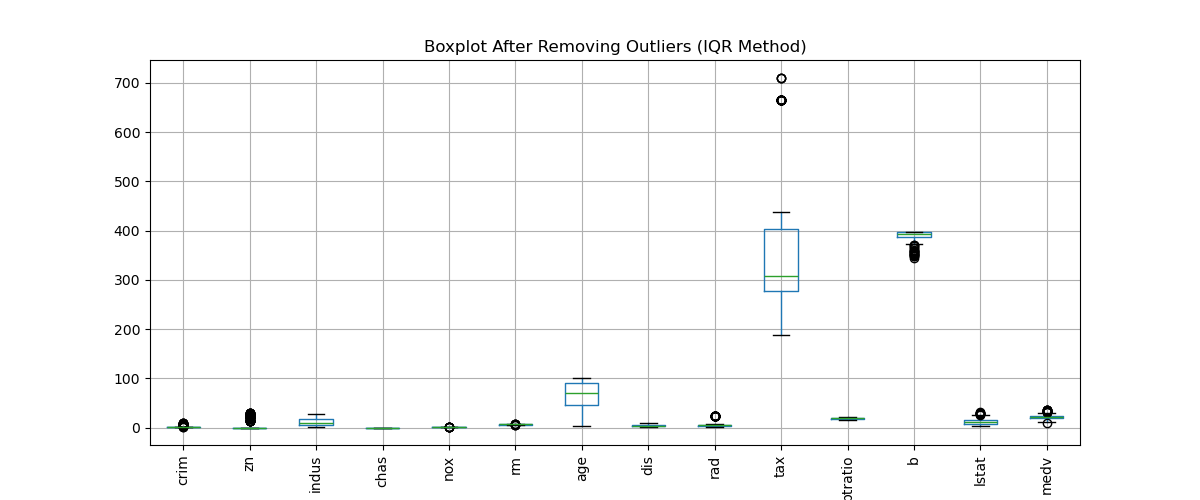

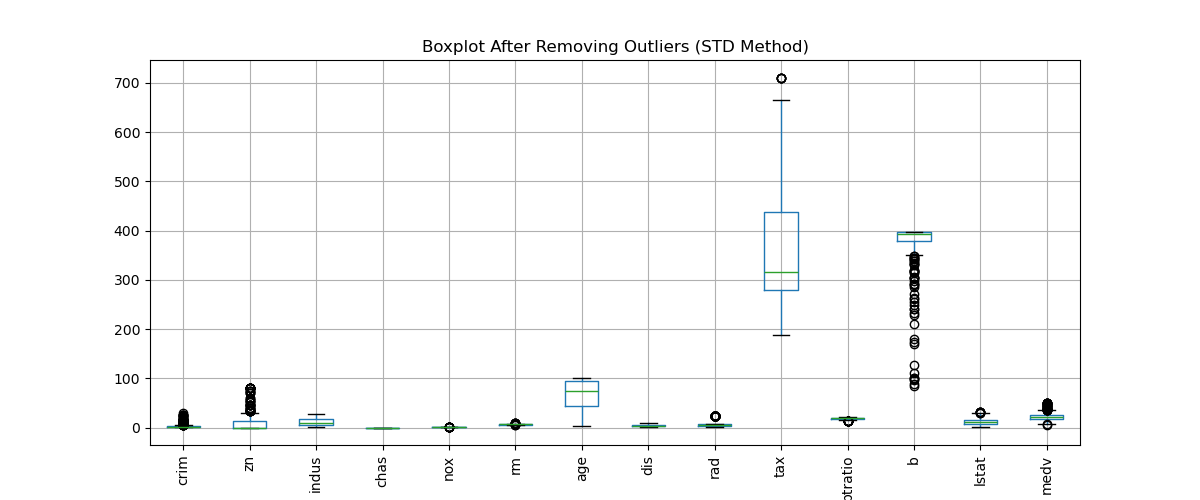